**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?


In [4]:
# code generated using chat gpt

import pandas as pd

# Load the dataset
file_path = '/workspace/the_bootstrap/data/mammogram.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Cross-tabulation of treatment and breast_cancer_death
crosstab = pd.crosstab(data['treatment'], data['breast_cancer_death'])
print("Cross-tabulation:\n", crosstab)

# Calculate survival rates
control_survival_rate = crosstab.loc['control', 'no'] / crosstab.loc['control'].sum()
mammogram_survival_rate = crosstab.loc['mammogram', 'no'] / crosstab.loc['mammogram'].sum()

# Difference in survival rates
difference = mammogram_survival_rate - control_survival_rate

# Display results
print(f"Control group survival rate: {control_survival_rate:.4f}")
print(f"Mammogram group survival rate: {mammogram_survival_rate:.4f}")
print(f"Difference in survival rates: {difference:.4f}")


Cross-tabulation:
 breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
Control group survival rate: 0.9888
Mammogram group survival rate: 0.9889
Difference in survival rates: 0.0001



2. Bootstrap the densities and distributions of survival rates for the two groups. 


Observed Difference: 0.0001


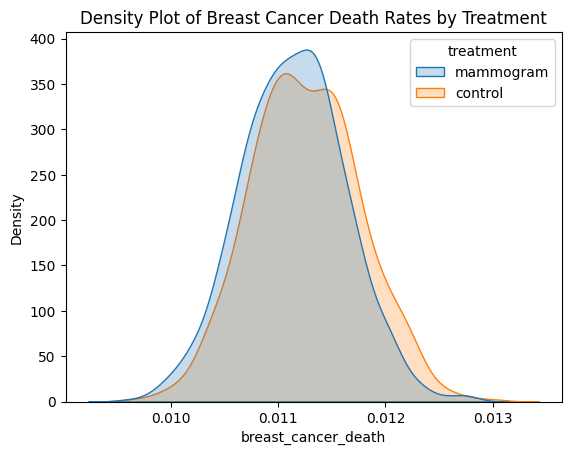

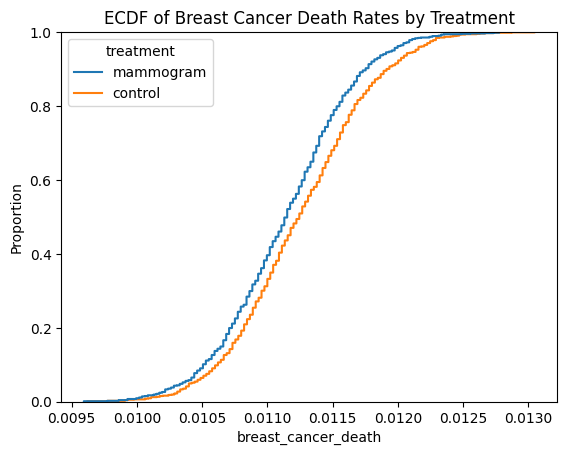

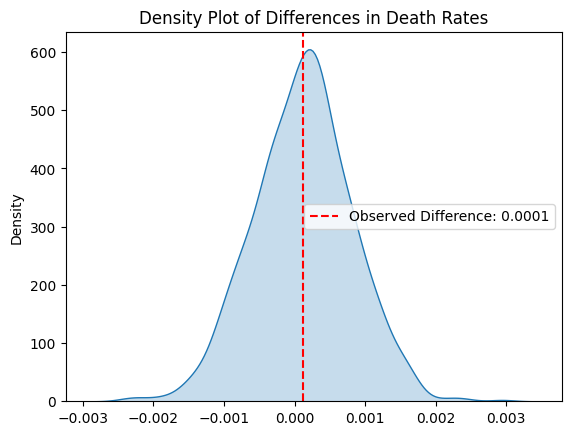

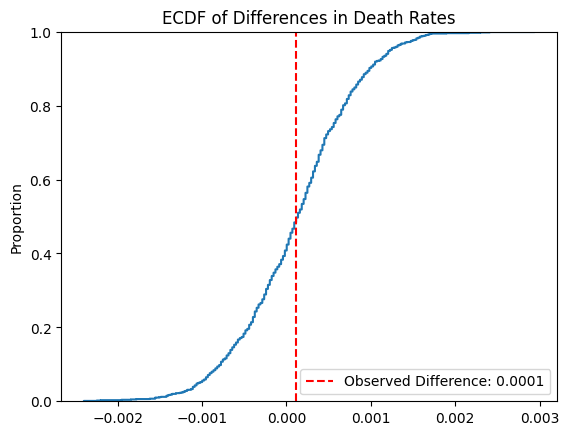

In [5]:
# code generated with help from chat gpt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is loaded correctly
df = pd.read_csv("/workspace/the_bootstrap/data/mammogram.csv")

# Convert 'breast_cancer_death' to binary (1 for 'yes', 0 for 'no') if not already
df['breast_cancer_death'] = df['breast_cancer_death'].map({'yes': 1, 'no': 0})

# Full sample death averages and difference
mam_0 = df.loc[df['treatment'] == 'mammogram', 'breast_cancer_death'].mean()
control_0 = df.loc[df['treatment'] == 'control', 'breast_cancer_death'].mean()
diff_0 = control_0 - mam_0
print(f"Observed Difference: {diff_0:.4f}")

# Mammogram data
df_mam = df.loc[df['treatment'] == 'mammogram', 'breast_cancer_death']
N_mam = df_mam.shape[0]

# Control data
df_control = df.loc[df['treatment'] == 'control', 'breast_cancer_death']
N_control = df_control.shape[0]

# Simulation
S = 1000  # Number of bootstrap samples
rate_mam = np.zeros(S)
rate_control = np.zeros(S)
diff = np.zeros(S)

# Bootstrapping
for s in range(S):
    sample_mam = df_mam.sample(N_mam, replace=True)  # Resample mammogram group
    rate_mam[s] = sample_mam.mean()  # Mean death rate for mammogram group
    sample_control = df_control.sample(N_control, replace=True)  # Resample control group
    rate_control[s] = sample_control.mean()  # Mean death rate for control group
    diff[s] = rate_control[s] - rate_mam[s]  # Difference in rates

# Combine mammogram and control results into one dataframe for plotting
rdf_mam = pd.DataFrame({'treatment': 'mammogram', 'breast_cancer_death': rate_mam})
rdf_control = pd.DataFrame({'treatment': 'control', 'breast_cancer_death': rate_control})
rdf = pd.concat([rdf_mam, rdf_control], axis=0)

# Density plot of breast cancer death rates
sns.kdeplot(data=rdf, x='breast_cancer_death', hue='treatment', fill=True)
plt.title("Density Plot of Breast Cancer Death Rates by Treatment")
plt.show()

# ECDF of breast cancer death rates
sns.ecdfplot(data=rdf, x='breast_cancer_death', hue='treatment')
plt.title("ECDF of Breast Cancer Death Rates by Treatment")
plt.show()

# Density plot of differences in rates
ax = sns.kdeplot(diff, fill=True)
ax.axvline(x=diff_0, color='red', linestyle='--', label=f'Observed Difference: {diff_0:.4f}')
plt.title("Density Plot of Differences in Death Rates")
plt.legend()
plt.show()

# ECDF of differences in rates
ax = sns.ecdfplot(diff)
ax.axvline(x=diff_0, color='red', linestyle='--', label=f'Observed Difference: {diff_0:.4f}')
plt.title("ECDF of Differences in Death Rates")
plt.legend()
plt.show()


3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?


In [ ]:
# code generated using chat gpt
# Construct the 99% confidence interval
lower_bound = np.percentile(diff, 0.5)  # 0.5th percentile
upper_bound = np.percentile(diff, 99.5)  # 99.5th percentile

# Display the results
print(f"99% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")
print("Does the confidence interval include zero?", "Yes" if lower_bound <= 0 <= upper_bound else "No")


99% Confidence Interval: (-0.0018, 0.0019)
Does the confidence interval include zero? Yes



4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

If the sampling pool consists of a generic selection of women (indiscriminate of prior breast cancer diagnosis) then the death rates are likely similar because the mammogram only makes a difference if the patient actually has breast cancer. Additional data about the patients' gender, age, prior health conditions, and breast cancer diagosis status across the 25 years would be helpful.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.


In [1]:
import pandas as pd

# Load the dataset
file_path = '/workspace/the_bootstrap/data/diabetes_hw.csv'  # Adjust the path as necessary
data = pd.read_csv(file_path)

# Cross-tabulation of treatment and outcome
crosstab = pd.crosstab(data['treatment'], data['outcome'])
print("Cross-tabulation of treatment and outcome:\n")
print(crosstab)


Cross-tabulation of treatment and outcome:

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143



2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?


In [ ]:
# generated using chat gpt

success_rates = crosstab['success'] / crosstab.sum(axis=1)

# Display the success rates
print("Proportion of Successes for Each Treatment:\n")
print(success_rates)

# Determine the most effective treatment
most_effective_treatment = success_rates.idxmax()
highest_rate = success_rates.max()

print(f"\nMost Effective Treatment: {most_effective_treatment} with a success rate of {highest_rate:.2%}")


Proportion of Successes for Each Treatment:

treatment
lifestyle    0.534188
met          0.482759
rosi         0.613734
dtype: float64

Most Effective Treatment: rosi with a success rate of 61.37%



3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?


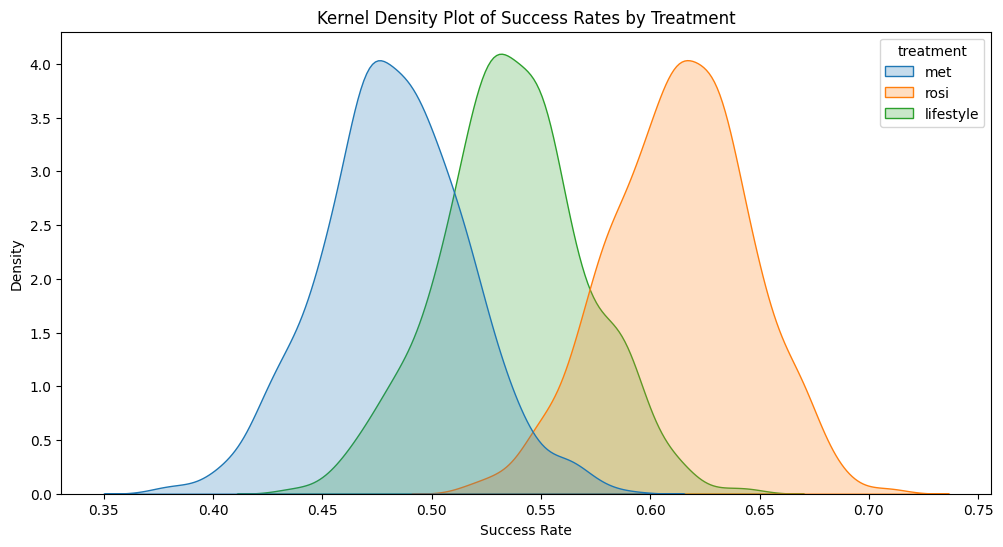

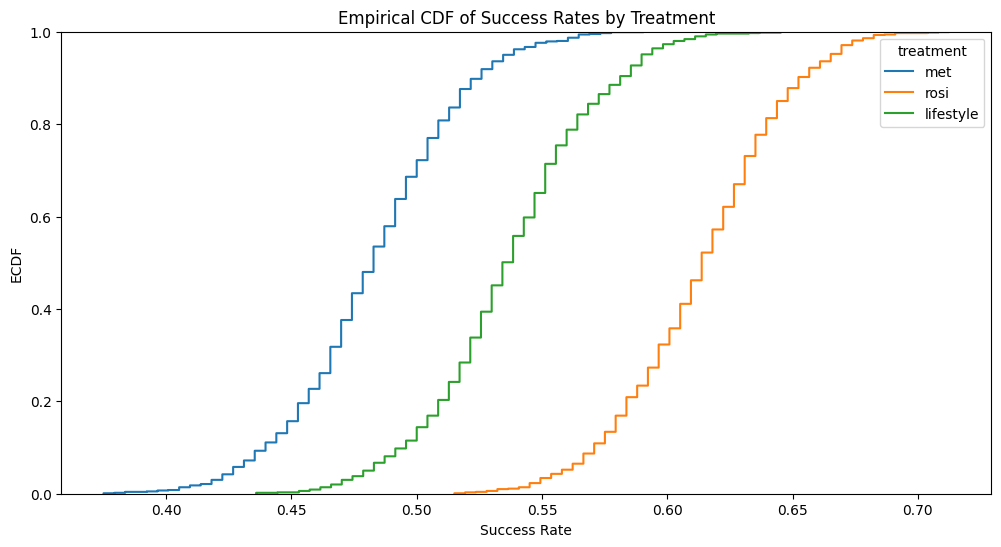

The most effective treatment based on bootstrapping is 'rosi' with an average success rate of 61.33%.


In [ ]:
# code generated with help from chat gpt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/workspace/the_bootstrap/data/diabetes_hw.csv')

# Convert 'outcome' to binary (1 for 'success', 0 for 'failure')
df['outcome'] = df['outcome'].map({'success': 1, 'failure': 0})

# Prepare data for bootstrapping
bootstraps = 1000  # Number of bootstrap iterations
treatment_types = df['treatment'].unique()  # Unique treatment types
bootstrap_results = []

# Bootstrap simulation
for treatment in treatment_types:
    treatment_data = df[df['treatment'] == treatment]
    for _ in range(bootstraps):
        # Resample data
        sample = treatment_data.sample(frac=1, replace=True)
        # Calculate success proportion
        success_rate = sample['outcome'].mean()
        bootstrap_results.append({'treatment': treatment, 'success_rate': success_rate})

# Convert results to DataFrame
bootstrap_df = pd.DataFrame(bootstrap_results)

# Kernel density plot of success rates by treatment
plt.figure(figsize=(12, 6))
sns.kdeplot(data=bootstrap_df, x='success_rate', hue='treatment', fill=True)
plt.title("Kernel Density Plot of Success Rates by Treatment")
plt.xlabel("Success Rate")
plt.ylabel("Density")
plt.show()

# Empirical CDF plot of success rates by treatment
plt.figure(figsize=(12, 6))
sns.ecdfplot(data=bootstrap_df, x='success_rate', hue='treatment')
plt.title("Empirical CDF of Success Rates by Treatment")
plt.xlabel("Success Rate")
plt.ylabel("ECDF")
plt.show()

# Determine most effective treatment from bootstrapping
average_success_rates = bootstrap_df.groupby('treatment')['success_rate'].mean()
most_effective = average_success_rates.idxmax()
highest_rate = average_success_rates.max()

print(f"The most effective treatment based on bootstrapping is '{most_effective}' with an average success rate of {highest_rate:.2%}.")




4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?


                pair  lower_bound  upper_bound  significant
0        met vs rosi    -0.204123    -0.053172         True
1   met vs lifestyle    -0.128660     0.025903        False
2  rosi vs lifestyle     0.002560     0.152379         True


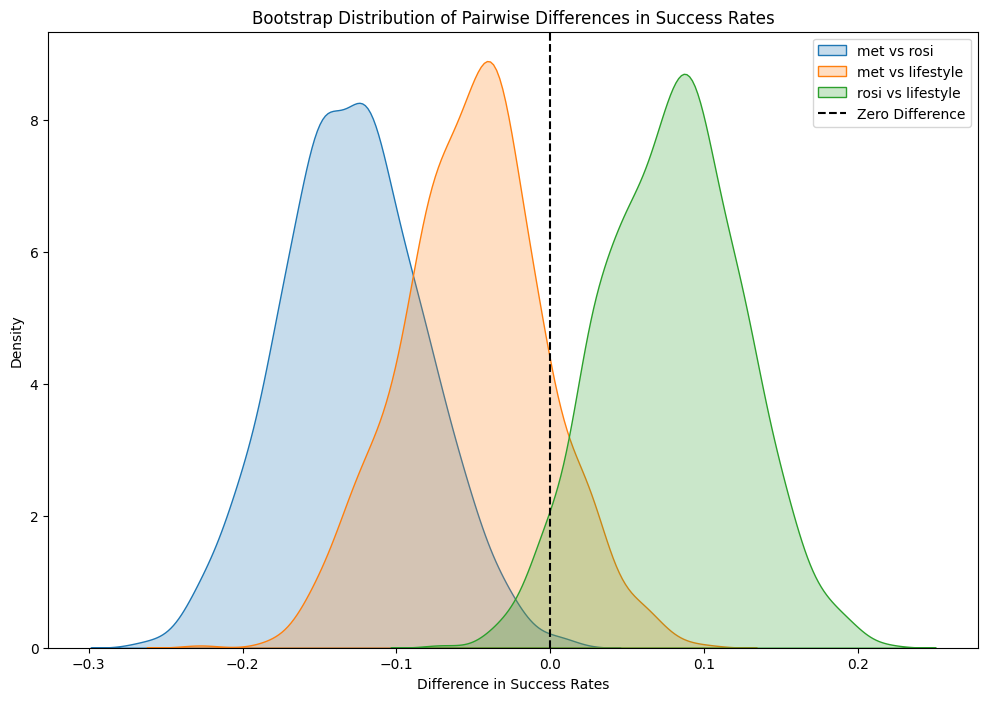

In [ ]:
# code generated with help from chat gpt

from itertools import combinations

# Prepare for bootstrapping
treatment_pairs = list(combinations(df['treatment'].unique(), 2))  # All pairwise combinations
bootstrap_differences = []

# Bootstrap simulation for pairwise differences
for treatment_a, treatment_b in treatment_pairs:
    data_a = df[df['treatment'] == treatment_a]['outcome']
    data_b = df[df['treatment'] == treatment_b]['outcome']
    diffs = []

    for _ in range(1000):  # Bootstrap iterations
        sample_a = data_a.sample(frac=1, replace=True)
        sample_b = data_b.sample(frac=1, replace=True)
        diff = sample_a.mean() - sample_b.mean()
        diffs.append(diff)

    # Store results
    bootstrap_differences.append({
        'pair': f"{treatment_a} vs {treatment_b}",
        'diffs': diffs
    })

# Analyze confidence intervals
significance_results = []

for result in bootstrap_differences:
    diffs = result['diffs']
    lower_bound = np.percentile(diffs, 5)  # Lower bound of 90% CI
    upper_bound = np.percentile(diffs, 95)  # Upper bound of 90% CI
    significant = not (lower_bound <= 0 <= upper_bound)  # Significant if CI doesn't include 0

    significance_results.append({
        'pair': result['pair'],
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'significant': significant
    })

# Display significance results
significance_df = pd.DataFrame(significance_results)
print(significance_df)

# Plot density plots for differences
plt.figure(figsize=(12, 8))
for result in bootstrap_differences:
    sns.kdeplot(result['diffs'], label=result['pair'], fill=True)

plt.axvline(0, color='black', linestyle='--', label='Zero Difference')
plt.xlabel('Difference in Success Rates')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of Pairwise Differences in Success Rates')
plt.legend()
plt.show()


5. Which treatment appears to be the most effective overall?

### It seems that Rosi is the most effective treatment by multiple metrics. Rosi has a significant effect when compared with the other two treatments, whereas the other two treatments have no significant difference when compared to each other.